In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


#Some code to beautify the plots
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

## Laplace's approximation to the Binomial distribution

A Binomial$(n,p)$ random variable counts the number of successes of $n$ different independent experiments, each with probability $p$ of success (and $1-p$ failure). The probability mass function of the Binomial$(n,p)$ random variable is 
$$ P(X=k) = {n \choose k} p^k (1-p)^k \qquad k=0,\dots,n.$$

However, we can also write $X \sim \text{Binomial}(n,p)$ as 
$$ X  = X_1 + \dots + X_n \qquad X_j \sim \text{Bernoulli}(p), \> j=1,\dots,n.$$
That is, we can describe a Binomial$(n,p)$ random variable as a sum of $n$ independent Bernoulli$(p)$ random variables. 
Furthermore, note that $E[X_j] = p$ and $\text{var}(X_j) = p(1-p)$ so that $E[X] = np$ and $\text{var}(X) = np(1-p)$. 
This allows us to apply the CLT and we obtain: 



### Theorem: Laplace's approximation
Let $X \sim \text{Binomial}(n,p)$. Then, as $n\rightarrow \infty$
$$ P\left(  a \leq \frac{X - np}{\sqrt{np(1-p)}} \leq b\right) \rightarrow \Phi(b)-\Phi(a),$$
where $\Phi(\cdot)$ is the cdf of a standard Normal random variable.


Let us consider the following example that will help us illustrate this approximation.

## Example


Let $X$ be the number of times that a fair coin that is flipped $40$ times lands on heads. In this problem, $n = 40$ and $p=0.5$. 

In [2]:
n = 40; p = 0.5

### Plot the binomial and compare with the normal

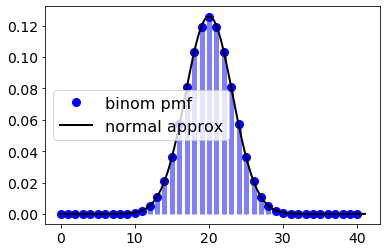

In [3]:
from scipy.stats import binom, norm
fig, ax = plt.subplots(1, 1)
x = np.arange(0,  n+1)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

x = np.linspace(0,n+1,100)
mu = n*p; sigma = np.sqrt(n*p*(1-p))
rv = norm(mu,sigma)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label = 'normal approx')

ax.legend(fontsize = 16)

### Compare the two distributions 

We want to compute
$$ P(20 \leq X \leq 30) $$

using the Binomial distribution and using the normal approximation to the Binomial. 

In [4]:
# Binomial 
pb =  [binom.pmf(x, n, p) for x in range(20,31)]
pb = np.sum(np.array(pb))
print("The desired probability using the Binomial distribution is", pb)

pn = rv.cdf(30)-rv.cdf(20)
print("Using the Normal approximation to the Binomial distribution is", pn)

pn = rv.cdf(30.5)-rv.cdf(19.5) #Adjust the limits slightly to improve accuracy
print("Using the Normal approximation with continuity correction.", pn)

The desired probability using the Binomial distribution is 0.5623455696822897
Using the Normal approximation to the Binomial distribution is 0.49921729887099875
Using the Normal approximation with continuity correction. 0.5623670130244971


### How good is the approximation, when $n$ varies?

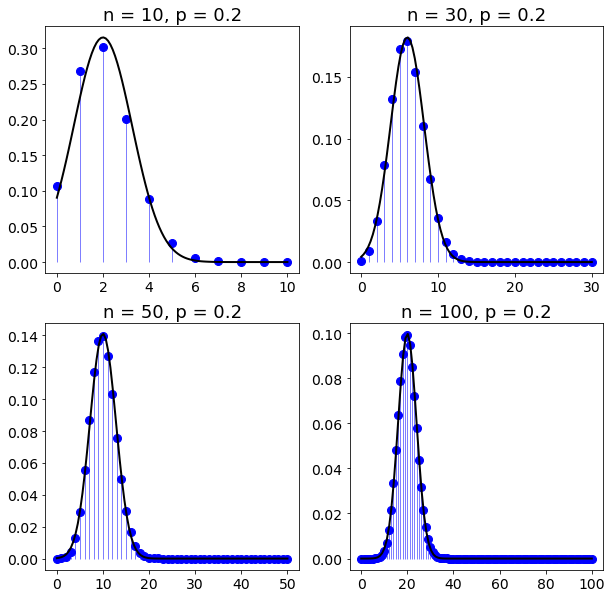

In [5]:
nlst = [10,30,50,100]
p = 0.2
fig, axarray = plt.subplots(2, 2, figsize = (10,10))

for n, ax in zip(nlst,axarray.flatten()):
    x = np.arange(0,  n+1)
    ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8)
    ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=1, alpha=0.5)

    x = np.linspace(0,n,100)
    mu = n*p; sigma = np.sqrt(n*p*(1-p))
    rv = norm(mu,sigma)
    ax.plot(x, rv.pdf(x), 'k-', lw=2)
    ax.set_title('n = ' + str(n) + ', p = ' + str(p), fontsize = 18)
    

### How good is the approximation, when $p$ varies?

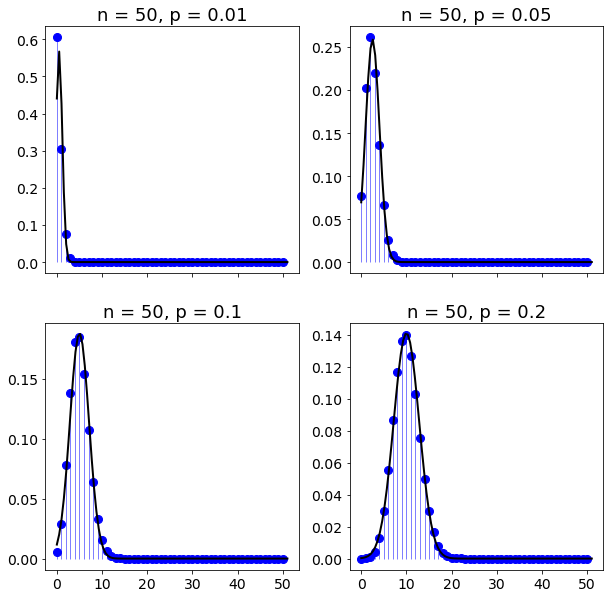

In [6]:
plst = [0.01, 0.05, 0.1, 0.2]
fig, axarray = plt.subplots(2, 2, figsize = (10,10), sharex = True)

n = 50
for p, ax in zip(plst,axarray.flatten()):
    x = np.arange(0,  n+1)
    ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8)
    ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=1, alpha=0.5)

    x = np.linspace(0,n+1,100)
    mu = n*p; sigma = np.sqrt(n*p*(1-p))
    rv = norm(mu,sigma)
    ax.plot(x, rv.pdf(x), 'k-', lw=2)
    ax.set_title('n = ' + str(n) + ', p = ' + str(p), fontsize = 18)
